Picture yourself stepping into an enormous bazaar crammed with gadgets, books, films, and songs. Finding what you’ll actually enjoy could feel like digging for a needle in a haystack—unless a helpful guide whispers, “Try this, you’ll probably love it!”
That guide is a **recommender system**. Its job is to scan mountains of data (your past choices, ratings from millions of others, item descriptions, etc.) and shortlist the things you’re most likely to appreciate, reducing search time and boosting satisfaction.

---

### Collaborative Recommendation—letting the crowd guide you

Where content-based methods compare product features (“If you liked a thriller, here’s another thriller”), **collaborative approaches** focus on _human behaviour_. They reason that people who behaved alike yesterday will probably behave alike tomorrow. Instead of analysing plot summaries or ingredient lists, they analyse interactions—ratings, clicks, purchases—to uncover patterns of agreement.

Collaborative filtering comes in two classic flavours:

| Flavour                                    | Core Idea                                                                                                                       | Everyday Parallel                                         | When It Shines                                                                                         |
| ------------------------------------------ | ------------------------------------------------------------------------------------------------------------------------------- | --------------------------------------------------------- | ------------------------------------------------------------------------------------------------------ |
| **User-based** (“people-who-resemble-you”) | Find other users whose taste profile overlaps with yours; offer items they enjoyed that you haven’t seen yet.                   | A friend who loves the same bands recommends a new album. | Catalog is volatile (items change often) but user base is stable.                                      |
| **Item-based** (“things-that-go-together”) | Look at pairs of items that frequently appear together in many users’ histories; suggest the companion item when one is chosen. | Buying peanut butter triggers a suggestion for jam.       | User count dwarfs item count (e.g., online store with few thousand products but millions of shoppers). |

---

#### A quick walk-through

1. **User-based snapshot**
   _Dataset:_

   ```
   Alice:  🍔  🍰  🍕
   Bob:    🍔
   Carol:  🍕  🥗
   ```

   Carol’s record looks most like Alice’s (both ordered pizza). Alice also ordered a burger and cake, so Carol receives “burger” and “cake” as recommendations.

2. **Item-based snapshot**
   Build an “item co-occurrence” map:

   - Burger often co-appears with pizza
   - Salad often co-appears with pizza
     If Carol orders pizza, burger pops up as a logical add-on—even if no single “similar user” exists.

---

### Why businesses adore it

- **Streaming video:** Netflix pairs you with viewers who binge the same niche mini-series, then surfaces a hidden gem you might never notice.
- **E-commerce:** Amazon observes that buyers of a digital drawing tablet usually grab a stylus too; it nudges the stylus onto your cart page.
- **Social networks:** LinkedIn spots professionals with overlapping connections and surfaces new “People You May Know.”

---

### Strengths & watch-outs

_Pros_

- Captures collective wisdom—can recommend entirely new genres you never explored.
- Learns continuously as more interactions flow in.

_Cons_

- Suffers from the **cold-start** problem: if a brand-new user has no history, or a brand-new item has no ratings, the model lacks signals.
- Very large rating matrices are sparse, so smart similarity measures and matrix-factorisation tricks are needed for scalability.

---

#### Beyond the basics

Most real-world services blend collaborative and content signals into **hybrid** models—balancing popularity trends, textual features, and human overlap to deliver richer, more personalised suggestions.

---

In short, collaborative recommendation systems harness the collective footprints of users to become that knowledgeable friend who slips the perfect product, movie, or tune into your hands—before you even realise you wanted it.


Let’s understand **Collaborative Filtering** in both **User-Based** and **Item-Based** approaches using a **Correlation Coefficient (Pearson)** example.

---

## 📌 Collaborative Filtering Overview

- **User-Based Collaborative Filtering (UBCF):** Recommends items to a user based on the preferences of similar users.
- **Item-Based Collaborative Filtering (IBCF):** Recommends items similar to what the user already liked or rated highly, based on item similarity.

Both methods rely on the **Pearson Correlation Coefficient** to measure **similarity**.

---

## 🎯 Example Dataset (Ratings Matrix)

| User/Item | Item A | Item B | Item C | Item D |
| --------- | ------ | ------ | ------ | ------ |
| User 1    | 5      | 3      | 4      | 4      |
| User 2    | 3      | 1      | 2      | 3      |
| User 3    | 4      | 3      | 4      | 3      |
| User 4    | 3      | 3      | 1      | 5      |
| User 5    | 1      | 5      | 5      | 2      |

Let’s calculate Pearson Correlation step-by-step.

---

## 🔹 1. User-Based Collaborative Filtering

Suppose we want to recommend an item for **User 1** based on **similar users**.

### Step 1: Pick two users to compare (e.g., User 1 and User 3)

| Item | User 1 | User 3 |
| ---- | ------ | ------ |
| A    | 5      | 4      |
| B    | 3      | 3      |
| C    | 4      | 4      |
| D    | 4      | 3      |

### Step 2: Compute Pearson Correlation Coefficient

The formula is:

$$
r = \frac{\sum{(x_i - \bar{x})(y_i - \bar{y})}}{\sqrt{\sum{(x_i - \bar{x})^2}} \sqrt{\sum{(y_i - \bar{y})^2}}}
$$

- $x_i$: ratings of User 1
- $y_i$: ratings of User 3

#### Calculate Means:

- $\bar{x} = (5+3+4+4)/4 = 4.0$
- $\bar{y} = (4+3+4+3)/4 = 3.5$

#### Now, compute the components:

| Item | x (U1) | y (U3) | x-4.0 | y-3.5 | (x-4)(y-3.5) | (x-4)² | (y-3.5)² |
| ---- | ------ | ------ | ----- | ----- | ------------ | ------ | -------- |
| A    | 5      | 4      | 1     | 0.5   | 0.5          | 1      | 0.25     |
| B    | 3      | 3      | -1    | -0.5  | 0.5          | 1      | 0.25     |
| C    | 4      | 4      | 0     | 0.5   | 0            | 0      | 0.25     |
| D    | 4      | 3      | 0     | -0.5  | 0            | 0      | 0.25     |

$$
r = \frac{0.5 + 0.5 + 0 + 0}{\sqrt{1+1+0+0} \cdot \sqrt{0.25+0.25+0.25+0.25}} = \frac{1}{\sqrt{2} \cdot \sqrt{1}} = \frac{1}{1.414} ≈ 0.71
$$

So, similarity between User 1 and User 3 is **0.71**.

---

## 🔹 2. Item-Based Collaborative Filtering

Suppose we want to find items similar to **Item A** for a recommendation.

### Step 1: Pick two items to compare (Item A and Item C)

| User | Item A | Item C |
| ---- | ------ | ------ |
| U1   | 5      | 4      |
| U2   | 3      | 2      |
| U3   | 4      | 4      |
| U4   | 3      | 1      |
| U5   | 1      | 5      |

### Step 2: Compute Pearson Correlation Coefficient

#### Calculate Means:

- $\bar{x} = (5+3+4+3+1)/5 = 3.2$
- $\bar{y} = (4+2+4+1+5)/5 = 3.2$

#### Compute the components:

| User | x (A) | y (C) | x-3.2 | y-3.2 | (x-3.2)(y-3.2) | (x-3.2)² | (y-3.2)² |
| ---- | ----- | ----- | ----- | ----- | -------------- | -------- | -------- |
| U1   | 5     | 4     | 1.8   | 0.8   | 1.44           | 3.24     | 0.64     |
| U2   | 3     | 2     | -0.2  | -1.2  | 0.24           | 0.04     | 1.44     |
| U3   | 4     | 4     | 0.8   | 0.8   | 0.64           | 0.64     | 0.64     |
| U4   | 3     | 1     | -0.2  | -2.2  | 0.44           | 0.04     | 4.84     |
| U5   | 1     | 5     | -2.2  | 1.8   | -3.96          | 4.84     | 3.24     |

$$
r = \frac{1.44 + 0.24 + 0.64 + 0.44 - 3.96}{\sqrt{3.24 + 0.04 + 0.64 + 0.04 + 4.84} \cdot \sqrt{0.64 + 1.44 + 0.64 + 4.84 + 3.24}}
$$

$$
r = \frac{-1.2}{\sqrt{8.8} \cdot \sqrt{10.8}} = \frac{-1.2}{2.966 \cdot 3.286} ≈ \frac{-1.2}{9.75} ≈ -0.123
$$

So, similarity between Item A and C is **-0.123**, which indicates **negative correlation** — i.e., they are dissimilar.

---

## ✅ Summary

| Approach   | Compared Entities | Correlation | Meaning              |
| ---------- | ----------------- | ----------- | -------------------- |
| User-Based | User 1 & User 3   | 0.71        | Users are similar    |
| Item-Based | Item A & Item C   | -0.123      | Items are dissimilar |

---

Would you like me to show how to **implement this in Python** using NumPy or Pandas?


# Hybrid Model


Below is a worked-through **“rank-combination” hybrid** on the _same four-product toy data set_ we have been using ( P1 – P4 ).
The idea taken from the book is:

1. **Produce two ranked lists** – one from Collaborative Filtering (CF) and one from a Content-Based model (CB).
2. **Transform every rank into a score** so that higher ranks carry more weight.
   _I’ll use the simple linear scale the book suggests:_

| Rank | Score |
| ---- | ----- |
| 1st  | 1.00  |
| 2nd  | 0.75  |
| 3rd  | 0.50  |
| 4th  | 0.25  |

3. **Add the two scores** for each item (Combined Score) and also keep their mean (Average Score).
4. **Sort by the Combined Score** to get the final recommendation order.

---

### 1 Two input lists

| Collaborative list (best → worst) | Content-based list (best → worst) |
| --------------------------------- | --------------------------------- |
| **P2**, P4, P1, P3                | **P1**, P2, P3, P4                |

(Think of the CF list as “people-like-you bought …”, and the CB list as “similar attributes to what you browsed …”.)

---

### 2 Mapping ranks to scores

| Item | CF rank | CF score | CB rank | CB score |
| ---- | ------- | -------- | ------- | -------- |
| P1   | 3       | 0.50     | 1       | 1.00     |
| P2   | 1       | 1.00     | 2       | 0.75     |
| P3   | 4       | 0.25     | 3       | 0.50     |
| P4   | 2       | 0.75     | 4       | 0.25     |

---

### 3 Combine and average

| Item   | Combined Score | Average Score |
| ------ | -------------- | ------------- |
| **P2** | **1.75**       | 0.875         |
| **P1** | **1.50**       | 0.750         |
| P4     | 1.00           | 0.500         |
| P3     | 0.75           | 0.375         |

_(Combined Score = CF score + CB score; Average Score = Combined Score ÷ 2.)_

---

### 4 Final hybrid ranking

1. **P2** (Combined 1.75)
2. **P1** (1.50)
3. **P4** (1.00)
4. **P3** (0.75)

This matches the sequence quoted in the book: P2 → P1 → P4 → P3.
Because each product inherits strength from both recommenders, the hybrid list is usually more balanced than either CF or CB on its own—for example P4 rises above P3 thanks to strong CF support even though its content match is weak.

---

#### Why this “rank-combination” trick helps

- **Robust to scale:** We never mix raw ratings (which can be on different scales); we just mix positions.
- **Dampens extreme bias:** An item that tops one list but is ignored in the other still has to contend with the second opinion.
- **Easy to tune:** If you want to lean more on CF, just change the score ladder or apply different weights to the two lists.


In [ ]:
import pandas as pd

# Paths to the four MovieLens-100k files you mounted on Drive
base_path  = "./"
ratings_all = pd.read_csv(base_path + "u.data",
                          sep="\t",
                          names=["user_id", "movie_id", "rating", "timestamp"])

ratings_train = pd.read_csv(base_path + "ua.base",
                            sep="\t",
                            names=ratings_all.columns)

ratings_test  = pd.read_csv(base_path + "ua.test",
                            sep="\t",
                            names=ratings_all.columns)

users  = pd.read_csv(base_path + "u.user",
                     sep="|",
                     names=["user_id", "age", "sex", "occupation", "zip_code"])

movies = pd.read_csv(base_path + "u.item",
                     sep="|",
                     names=["movie_id", "title", "release_date", "video_release_date",
                            "imdb_url", "unknown", "action", "adventure", "animation",
                            "children", "comedy", "crime", "documentary", "drama",
                            "fantasy", "film_noir", "horror", "musical", "mystery",
                            "romance", "sci_fi", "thriller", "war", "western"],
                     encoding="latin-1")


### 2 What each table contains (with an Indian analogy)

| Table                         | Rows    | Columns                                      | “What it means”                                            | Bollywood-friendly analogy                                                               |
| ----------------------------- | ------- | -------------------------------------------- | ---------------------------------------------------------- | ---------------------------------------------------------------------------------------- |
| **ratings_all (`u.data`)**    | 100 000 | `user_id`, `movie_id`, `rating`, `timestamp` | Every time someone pressed ★1–★5 for a film                | Think of BookMyShow logging every viewer’s star rating the moment they leave the theatre |
| **ratings_train (`ua.base`)** | 90 570  | same 4                                       | 90 % sample we’ll learn from                               | Your historical data till last weekend                                                   |
| **ratings_test (`ua.test`)**  | 9 430   | same 4                                       | 10 % sample kept aside for evaluation                      | Ratings from the latest movie releases, used only for judging accuracy                   |
| **users (`u.user`)**          | 943     | `age`, `sex`, `occupation`, `zip_code`       | Who rated what – basic demographics                        | Viewer is a 24-year-old _software engineer_ from Bengaluru (pin 560001)                  |
| **movies (`u.item`)**         | 1 682   | 24                                           | Film titles, release dates, IMDb link, plus 19 genre flags | “3 Idiots (2009)” gets `comedy=1`, `drama=1`, everything else 0                          |

---

### 3 Quick sanity-check numbers

| Metric                   | Value        | Interpretation                                                         |
| ------------------------ | ------------ | ---------------------------------------------------------------------- |
| Distinct users           | **943**      | A small city-size audience—the “Bhopal multiplex set.”                 |
| Distinct movies          | **1 682**    | Roughly every major Hollywood (and some Bollywood) release up to 1997. |
| Ratings per user (mean)  | \~106        | Each viewer has scored \~100 films—plenty of signal.                   |
| Ratings per movie (mean) | \~59         | Each film collected \~60 opinions.                                     |
| Global mean rating       | **3.53 / 5** | Viewers are slightly generous—like IMDb averages.                      |

---

### 4 Why these three tables matter for modelling

1. **`ratings_all` / train / test**
   _Fuel_ for collaborative filtering. `user_id` ↔ `movie_id` interactions are what matrix-factorisation or KNN algorithms learn from.

2. **`users`**
   Lets you build **hybrid** or **demographic** recommenders. Example: if 18-year-old Delhi students rate thrillers highly, you can use that prior when a brand-new Delhi student shows up (cold-start).

3. **`movies`**
   Powers **content-based** similarity. Even if two films never share the same audience, you can still link them through shared genres (“action-thriller”) or release year.

---

### 5 Relating it to an Indian OTT scenario

Imagine this dataset were captured by **“DesiStream”**, an Indian OTT platform in the late 1990s:

- **User ID 512**

  - 24 years, _male_, _student_, PIN 560103 (Bengaluru).
  - Rated ★★★★ to _Dilwale Dulhania Le Jayenge_ and ★★★★★ to _Sholay_.

- **User ID 777**

  - 23 years, _female_, _software engineer_, PIN 411001 (Pune).
  - Loves _Andaz Apna Apna_ (comedy 1).

When a _brand-new_ Pune engineer lands on DesiStream, we can:

1. **Collaborative** – Find users with similar rating patterns (User 777) and suggest what they adored.
2. **Content** – Notice she binge-watched comedies, so surface _Hera Pheri_.
3. **Hybrid** – Blend the two signals for a stronger, personalised queue.


In [ ]:
ratings_train.head()

,user_id,movie_id,rating,timestamp
0,1,1,5,874965758
1,1,2,3,876893171
2,1,3,4,878542960
3,1,4,3,876893119
4,1,5,3,889751712


In [ ]:
ratings_test.head()

,user_id,movie_id,rating,timestamp
0,1,20,4,887431883
1,1,33,4,878542699
2,1,61,4,878542420
3,1,117,3,874965739
4,1,155,2,878542201


In [ ]:
users.head()

,user_id,age,sex,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [ ]:
movies.head()

,movie_id,title,release_date,video_release_date,imdb_url,unknown,action,adventure,animation,children,...,fantasy,film_noir,horror,musical,mystery,romance,sci_fi,thriller,war,western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
# import pandas as pd
# movies = pd.read_csv("indian_movies.csv")
# ratings_train = pd.read_csv("indian_ratings_train.csv")

# users = pd.read_csv("indian_users.csv")

# ratings_test = pd.read_csv("indian_ratings_test.csv")


In [ ]:
!pip install -q lightfm

In [ ]:
from lightfm import LightFM
from lightfm.data import Dataset
import numpy as np


In [ ]:
# Step 2.1: Initialize Dataset
dataset = Dataset()
dataset.fit(
    users=ratings_train['user_id'].unique(),
    items=ratings_train['movie_id'].unique()
)

# Step 2.2: Build interactions with float ratings
interactions, weights = dataset.build_interactions(
    [(row['user_id'], row['movie_id'], float(row['rating']))
     for _, row in ratings_train.iterrows()]
)

print("Unique interaction weights:", np.unique(weights.tocoo().data))

Unique interaction weights: [1. 2. 3. 4. 5.]


In [ ]:
from scipy.sparse import coo_matrix

# Convert to COO if not already
interactions = interactions.tocoo()
weights = weights.tocoo()
import pandas as pd

interactions_df = pd.DataFrame({
    'user_id': interactions.row,
    'movie_id': interactions.col,
    'interaction': interactions.data
})

weights_df = pd.DataFrame({
    'user_id': weights.row,
    'movie_id': weights.col,
    'weight': weights.data
})


In [ ]:
interactions_df

,user_id,movie_id,interaction
0,0,0,1
1,0,1,1
2,0,2,1
3,0,3,1
4,0,4,1
...,...,...,...
90565,942,1034,1
90566,942,1063,1
90567,942,1173,1
90568,942,1211,1


In [ ]:
weights_df

,user_id,movie_id,weight
0,0,0,5.0
1,0,1,3.0
2,0,2,4.0
3,0,3,3.0
4,0,4,3.0
...,...,...,...
90565,942,1034,2.0
90566,942,1063,4.0
90567,942,1173,3.0
90568,942,1211,3.0


🧩 What Are We Visualizing?
interactions
Binary (1 if user rated a movie, 0 otherwise)
Implicit feedback
weights
Floats (actual ratings: 1.0 to 5.0)
Explicit feedback


In [ ]:
visual_df = interactions_df.merge(weights_df, on=['user_id', 'movie_id'])
visual_df = visual_df.sort_values(by=['user_id', 'movie_id']).reset_index(drop=True)

print(visual_df.head(10))  # See top 10 rows


   user_id  movie_id  interaction  weight
0        0         0            1     5.0
1        0         1            1     3.0
2        0         2            1     4.0
3        0         3            1     3.0
4        0         4            1     3.0
5        0         5            1     5.0
6        0         6            1     4.0
7        0         7            1     1.0
8        0         8            1     5.0
9        0         9            1     3.0


In [ ]:
from scipy.sparse import csr_matrix
import matplotlib.pyplot as plt
import numpy as np

# Ensure both are in CSR format for easy slicing
interactions_csr = interactions.tocsr()
weights_csr = weights.tocsr()

In [ ]:
# Take a small slice: first 10 users x first 10 movies
slice_size = 10
interactions_slice = interactions_csr[:slice_size, :slice_size].toarray()
weights_slice = weights_csr[:slice_size, :slice_size].toarray()

print("Interactions (binary):")
print(interactions_slice)

print("\nWeights (ratings):")
print(weights_slice)

Interactions (binary):
[[1 1 1 1 1 1 1 1 1 1]
 [1 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 1 1 1 0]
 [0 0 0 1 0 0 1 1 1 1]
 [0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [1 0 0 1 0 0 0 0 1 0]]

Weights (ratings):
[[5. 3. 4. 3. 3. 5. 4. 1. 5. 3.]
 [4. 0. 0. 0. 0. 0. 0. 0. 0. 2.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [4. 0. 0. 0. 0. 0. 2. 4. 4. 0.]
 [0. 0. 0. 5. 0. 0. 5. 5. 5. 4.]
 [0. 0. 0. 0. 0. 0. 3. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 4. 0. 0. 0.]
 [4. 0. 0. 4. 0. 0. 0. 0. 4. 0.]]


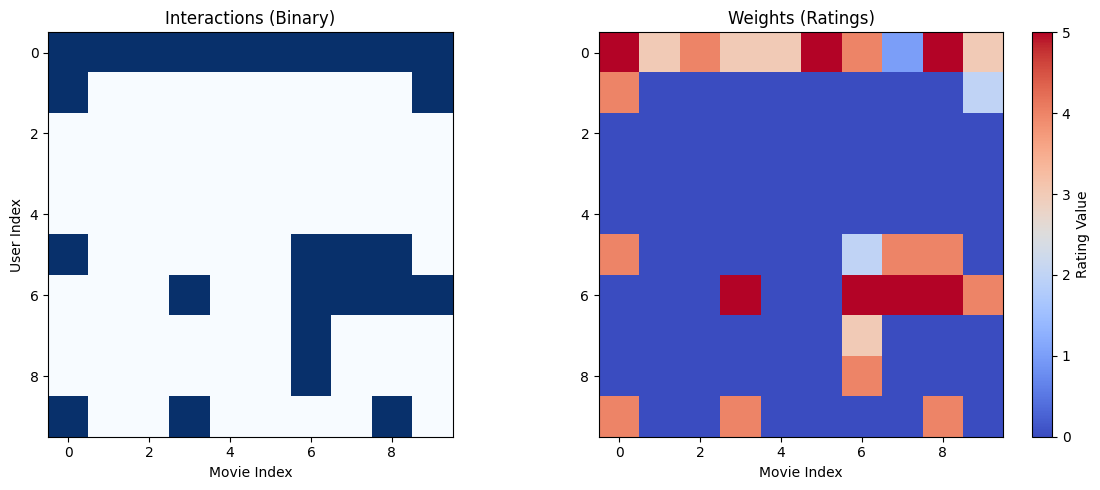

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot Interactions
axes[0].imshow(interactions_slice, cmap='Blues', interpolation='none')
axes[0].set_title('Interactions (Binary)')
axes[0].set_xlabel('Movie Index')
axes[0].set_ylabel('User Index')

# Plot Weights
im = axes[1].imshow(weights_slice, cmap='coolwarm', interpolation='none')
axes[1].set_title('Weights (Ratings)')
axes[1].set_xlabel('Movie Index')

# Add colorbar
plt.colorbar(im, ax=axes[1], label='Rating Value')

plt.tight_layout()
plt.show()

📊 Interpretation of Plots
Left Plot (interactions) : Shows which users have rated which movies (blue = rated).
Right Plot (weights) : Shows actual rating values — red means high rating, blue means low.
You’ll notice most cells are white — this shows how sparse the data is. Most users haven’t rated most movies.


🧠 Summary of What We've Done So Far
Here's what you've built in simple terms:

Collected User-Movie Ratings
Each row is a user, each column is a movie.
If a user rated a movie, it's marked as an interaction.
Built Two Matrices
interactions: Just tells us if a user rated a movie.
weights: Tells us how much they liked it (rating from 1–5).
Used LightFM to Handle This Efficiently
LightFM uses sparse matrices to save memory.
It can use either binary data (interactions) or explicit ratings (weights) for training.
Now Ready to Train Model
You can train using weights to make recommendations based on how much users liked things .


In [ ]:
from lightfm import LightFM
# STEP 3: Train the LightFM model using WARP loss
model = LightFM(no_components=32, loss='warp', random_state=42)

# Train using both interactions and weights
model.fit(interactions, sample_weight=weights, epochs=20, num_threads=2)
print("Model trained!")

Model trained!


In [ ]:
def recommend_movie_titles_for_user(model, dataset, user_id, movies_df, N=5):
    # Extract LightFM internal mappings
    user_id_map, _, item_id_map, _ = dataset.mapping()

    # Check if user_id exists in mapping
    if user_id not in user_id_map:
        raise ValueError(f"User ID {user_id} not found in the dataset mapping.")

    internal_user_id = user_id_map[user_id]
    num_items = len(item_id_map)

    # Predict scores for all items for the user
    scores = model.predict(user_ids=internal_user_id, item_ids=np.arange(num_items))

    # Get top N item indices (internal IDs)
    top_indices = np.argsort(-scores)[:N]  # negative for descending sort

    # Reverse mapping: internal → external movie_id
    inv_item_id_map = {v: k for k, v in item_id_map.items()}
    recommended_movie_ids = [inv_item_id_map[i] for i in top_indices]

    # Get movie titles
    recommended_movies = movies_df[movies_df['movie_id'].isin(recommended_movie_ids)]
    recommended_movies = recommended_movies.set_index('movie_id').loc[recommended_movie_ids].reset_index()

    return recommended_movies


In [ ]:
user_id_to_predict = 3  # External user_id (e.g., from dataset)
top_recommendations = recommend_movie_titles_for_user(model, dataset, user_id=user_id_to_predict, movies_df=movies, N=5)

print(f"Top 5 recommended movies for User {user_id_to_predict}:")
top_recommendations


Top 5 recommended movies for User 3:


,movie_id,title,release_date,video_release_date,imdb_url,unknown,action,adventure,animation,children,...,fantasy,film_noir,horror,musical,mystery,romance,sci_fi,thriller,war,western
0,327,Cop Land (1997),01-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Cop+Land+(1997),0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,258,Contact (1997),11-Jul-1997,NaN,http://us.imdb.com/Title?Contact+(1997/I),0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,340,Boogie Nights (1997),01-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Boogie+Nights...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,269,"Full Monty, The (1997)",01-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Full+Monty%2C...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,302,L.A. Confidential (1997),01-Jan-1997,NaN,http://us.imdb.com/M/title-exact?L%2EA%2E+Conf...,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0


In [ ]:
def get_user_history(user_id, ratings_df, movies_df, min_rating=4.0):
    """Get all movies a user has rated >= min_rating"""
    user_history = ratings_df[(ratings_df['user_id'] == user_id) & (ratings_df['rating'] >= min_rating)]
    return pd.merge(user_history, movies_df, on='movie_id')

# Step 1: What has user 3 rated highly in training data?
user_3_history = get_user_history(3, ratings_train, movies)
print(f"\nUser 3 Highly Rated Movies:\n{user_3_history[['movie_id', 'title', 'rating']]}")

# Step 2: What did we recommend to user 3?
recommended_3 = recommend_movie_titles_for_user(model, dataset, user_id=3, movies_df=movies, N=5)
print(f"\nTop 5 Recommended Movies for User 3:\n{recommended_3[['movie_id', 'title']]}")



User 3 Highly Rated Movies:
    movie_id                                              title  rating
0        181                          Return of the Jedi (1983)       4
1        260                               Event Horizon (1997)       4
2        318                            Schindler's List (1993)       4
3        320  Paradise Lost: The Child Murders at Robin Hood...       5
4        321                                      Mother (1996)       5
5        327                                    Cop Land (1997)       4
6        329                          Desperate Measures (1998)       4
7        340                               Boogie Nights (1997)       5
8        342                Man Who Knew Too Little, The (1997)       4
9        344                                Apostle, The (1997)       4
10       346                                Jackie Brown (1997)       5
11       347                                 Wag the Dog (1997)       5
12       348                       

# Item - Item Based


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Item embedding matrix (num_items x embedding_dim)
item_embeddings = model.item_embeddings
#model.item_embeddings is a matrix where each row corresponds to the embedding vector of an item (movie) learned by LightFM during training.

cos_sim_matrix = cosine_similarity(item_embeddings)
item_id_map = dataset.mapping()[2]  # movie_id to LightFM index
reverse_item_map = {v: k for k, v in item_id_map.items()}  # index to movie_id
def get_top_k_similar_items(movie_id, k=5):
    if movie_id not in item_id_map:
        print(f"Movie ID {movie_id} not found in item_id_map.")
        return []

    idx = item_id_map[movie_id]
    sim_scores = cos_sim_matrix[idx]

    # Exclude the item itself and get top-k indices
    similar_idx = np.argsort(-sim_scores)  # descending
    similar_idx = similar_idx[similar_idx != idx][:k]  # remove self

    similar_movie_ids = [reverse_item_map[i] for i in similar_idx]
    similar_scores = [sim_scores[i] for i in similar_idx]

    return list(zip(similar_movie_ids, similar_scores))



In [ ]:
print("Top 3 similar to movie 583:")
print(get_top_k_similar_items(583, k=3))

print("\nTop 3 similar to movie 884:")
print(get_top_k_similar_items(884, k=3))


Top 3 similar to movie 583:
[(np.int64(789), np.float32(0.7030558)), (np.int64(943), np.float32(0.6240309)), (np.int64(55), np.float32(0.58373845))]

Top 3 similar to movie 884:
[(np.int64(883), np.float32(0.84266955)), (np.int64(814), np.float32(0.79986435)), (np.int64(341), np.float32(0.7679291))]


In [ ]:
def print_similar_movies(movie_id, similar_movies, movies_df):
    # Get the movie title for the main movie
    main_title = movies_df[movies_df['movie_id'] == movie_id]['title'].values
    main_title = main_title[0] if len(main_title) > 0 else "Unknown Movie"

    print(f"Top {len(similar_movies)} similar movies to '{main_title}' (ID: {movie_id}):")

    for sim_movie_id, score in similar_movies:
        # Map sim_movie_id to title
        title = movies_df[movies_df['movie_id'] == sim_movie_id]['title'].values
        title = title[0] if len(title) > 0 else "Unknown Movie"
        print(f"  - {title} (ID: {sim_movie_id}) with similarity score: {score:.4f}")


In [ ]:
sim_583 = get_top_k_similar_items(583, k=3)
sim_884 = get_top_k_similar_items(884, k=3)
print_similar_movies(583, sim_583, movies)
print_similar_movies(884, sim_884, movies)


Top 3 similar movies to 'Romeo Is Bleeding (1993)' (ID: 583):
  - Swimming with Sharks (1995) (ID: 789) with similarity score: 0.7031
  - Killing Zoe (1994) (ID: 943) with similarity score: 0.6240
  - Professional, The (1994) (ID: 55) with similarity score: 0.5837
Top 3 similar movies to 'Year of the Horse (1997)' (ID: 884):
  - Telling Lies in America (1997) (ID: 883) with similarity score: 0.8427
  - Great Day in Harlem, A (1994) (ID: 814) with similarity score: 0.7999
  - Critical Care (1997) (ID: 341) with similarity score: 0.7679


In [ ]:
def print_similar_movies_with_genres(movie_id, similar_movies, movies_df, genre_columns):
    main_movie = movies_df[movies_df['movie_id'] == movie_id]
    main_title = main_movie['title'].values[0] if not main_movie.empty else "Unknown Movie"
    main_genres = main_movie[genre_columns].values[0] if not main_movie.empty else []

    print(f"Main movie: '{main_title}' (ID: {movie_id}), Genres: {', '.join([genre for genre, present in zip(genre_columns, main_genres) if present])}")
    print(f"Top {len(similar_movies)} similar movies:")

    for sim_movie_id, score in similar_movies:
        sim_movie = movies_df[movies_df['movie_id'] == sim_movie_id]
        if sim_movie.empty:
            print(f"  - Unknown Movie (ID: {sim_movie_id}), similarity: {score:.4f}")
            continue
        title = sim_movie['title'].values[0]
        genres = sim_movie[genre_columns].values[0]
        genre_list = [genre for genre, present in zip(genre_columns, genres) if present]
        print(f"  - {title} (ID: {sim_movie_id}), Genres: {', '.join(genre_list)}, similarity: {score:.4f}")


In [ ]:
genre_cols = ['action', 'adventure', 'animation', 'children', 'comedy', 'crime', 'documentary', 'drama', 'fantasy', 'film_noir', 'horror', 'musical', 'mystery', 'romance', 'sci_fi', 'thriller', 'war', 'western']

print_similar_movies_with_genres(583, sim_583, movies, genre_cols)


Main movie: 'Romeo Is Bleeding (1993)' (ID: 583), Genres: crime, thriller
Top 3 similar movies:
  - Swimming with Sharks (1995) (ID: 789), Genres: comedy, drama, similarity: 0.7031
  - Killing Zoe (1994) (ID: 943), Genres: thriller, similarity: 0.6240
  - Professional, The (1994) (ID: 55), Genres: crime, drama, romance, thriller, similarity: 0.5837


| Aspect                   | Your Current Code (Embedding-based similarity)                                                 | LightFM's `model.fit()` + `model.predict()` Recommendations                                |
| ------------------------ | ---------------------------------------------------------------------------------------------- | ------------------------------------------------------------------------------------------ |
| **What it uses**         | Pre-trained **item embeddings** to compute direct item-item similarity via cosine similarity   | Model trained on interactions, makes personalized predictions (scores) for user-item pairs |
| **Recommendation logic** | Recommend items similar to items user liked (content-similar)                                  | Model predicts personalized user-item interaction score (latent factors + loss function)   |
| **Personalization**      | Less personalized, based solely on item similarities                                           | Highly personalized, incorporates user preferences and interactions                        |
| **Flexibility**          | Can get item similarity independent of users, useful for cold start or quick similarity lookup | Requires user input and interaction matrix for prediction                                  |
| **Output**               | Returns items similar to a given item, with similarity scores                                  | Returns predicted scores for a user for all items, recommend top scoring                   |


# Popularity-based recommendation using average rating and count of ratings


We group ratings by movie_id and calculate average rating and rating count.

We filter out movies with fewer than a threshold number of ratings (to avoid recommending obscure movies with few ratings).

Sort by average rating (primary) and number of ratings (secondary).

Recommend the top-N movies from this sorted list.


In [ ]:
import pandas as pd

# Assuming ratings_train is your DataFrame with columns: user_id, movie_id, rating

# Step 1: Compute average rating and number of ratings per movie
movie_stats = ratings_train.groupby('movie_id').agg(
    avg_rating=('rating', 'mean'),
    rating_count=('rating', 'count')
).reset_index()

# Step 2: Filter movies with a minimum number of ratings to ensure popularity is meaningful
min_ratings = 10
popular_movies = movie_stats[movie_stats['rating_count'] >= min_ratings]

# Step 3: Sort by average rating and then by number of ratings (descending)
popular_movies = popular_movies.sort_values(['avg_rating', 'rating_count'], ascending=False)

# Step 4: Recommend top N popular movies
def recommend_popular_movies(n=10):
    top_movies = popular_movies.head(n)
    return top_movies[['movie_id', 'avg_rating', 'rating_count']]

# Example usage:
top_10_popular = recommend_popular_movies(10)
print(top_10_popular)


     movie_id  avg_rating  rating_count
113       114    4.491525            59
407       408    4.480769           104
168       169    4.476636           107
317       318    4.475836           269
482       483    4.459821           224
63         64    4.457364           258
11         12    4.386454           251
602       603    4.374359           195
49         50    4.365657           495
177       178    4.327434           113


In [ ]:
top_10_popular = top_10_popular.merge(movies[['movie_id', 'title']], on='movie_id', how='left')
print(top_10_popular[['movie_id', 'title', 'avg_rating', 'rating_count']])


   movie_id                                              title  avg_rating  \
0       114  Wallace & Gromit: The Best of Aardman Animatio...    4.491525   
1       408                              Close Shave, A (1995)    4.480769   
2       169                         Wrong Trousers, The (1993)    4.476636   
3       318                            Schindler's List (1993)    4.475836   
4       483                                  Casablanca (1942)    4.459821   
5        64                   Shawshank Redemption, The (1994)    4.457364   
6        12                         Usual Suspects, The (1995)    4.386454   
7       603                                 Rear Window (1954)    4.374359   
8        50                                   Star Wars (1977)    4.365657   
9       178                                12 Angry Men (1957)    4.327434   

   rating_count  
0            59  
1           104  
2           107  
3           269  
4           224  
5           258  
6           251